# A Finite Element Examples: Truss 02

This example shows how to run the truss02 example distributed with FEM.edu

## Load needed components

We need to add the local code to the path or python won't find FEM.edu

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join("..")))

## Loading the Example

In [2]:
from femedu.examples.trusses.truss02 import *

# load the example
ex = ExampleTruss02()

# print the doc-string for the current example
print(ex)

Example ExampleTruss02
^^^^^^^^^^^^^^^^^^^^^^^

        Statically determinate truss bridge.
        
        The system is statically determined and allows for relatively easy validation of 
        calculated deformation, reactions and internal forces.
        
        Author: Peter Mackenzie-Helnwein 
        



## Running the Example

norm of the out-of-balance force:   2.0000e+01
norm of the out-of-balance force:   3.8641e-01
norm of the out-of-balance force:   1.9880e-04
norm of the out-of-balance force:   1.7725e-06
norm of the out-of-balance force:   1.1472e-09
+

System Analysis Report

Nodes:
---------------------
  Node 0: {'ux': 0, 'uy': 1}
          x:[0. 0.], fix:['ux', 'uy'], 
          P:[0. 0.], u:[0. 0.]
  Node 1: {'ux': 0, 'uy': 1}
          x:[72.  0.], fix:[], 
          P:[0. 0.], u:[ 0.0175857  -0.18448191]
  Node 2: {'ux': 0, 'uy': 1}
          x:[144.   0.], fix:[], 
          P:[0. 0.], u:[ 0.05359577 -0.25049274]
  Node 3: {'ux': 0, 'uy': 1}
          x:[216.   0.], fix:[], 
          P:[0. 0.], u:[ 0.08960584 -0.18448191]
  Node 4: {'ux': 0, 'uy': 1}
          x:[288.   0.], fix:['uy'], 
          P:[0. 0.], u:[0.10719154 0.        ]
  Node 5: {'ux': 0, 'uy': 1}
          x:[36. 96.], fix:[], 
          P:[  0. -10.], u:[ 0.0988544  -0.11512624]
  Node 6: {'ux': 0, 'uy': 1}
          x:[108. 

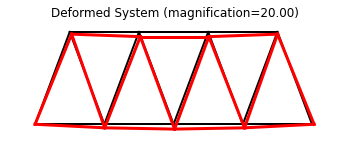

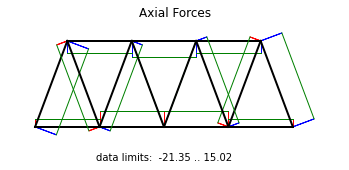

In [3]:
# run the actual problem
ex.run()


## More information

You can find the example input in `femedu/examples/trusses/truss02.py`

In [4]:
from IPython.display import Code

Code(filename='../femedu/examples/trusses/truss02.py', language='python')


"""
Example
"""
from ...examples.Example import *

from ...domain.System import *
from ...solver.NewtonRaphsonSolver import NewtonRaphsonSolver
from ...domain.Node import *
from ...elements.Truss import *
from ...materials.FiberMaterial import *


class ExampleTruss02(Example):

    def docString(self):
        s = """
        Statically determinate truss bridge.
        
        The system is statically determined and allows for relatively easy validation of 
        calculated deformation, reactions and internal forces.
        
        Author: Peter Mackenzie-Helnwein 
        """
        return s

    def problem(self):
        # initialize a system model
        P = -10.0      # reference load on top nodes
        B = 6.0 * 12   # with of one bay in inches
        H = 8.0 * 12   # height of one bay in inches
        # material model parameters
        params = {'E': 10000., 'A': 3., 'nu': 0.0, 'fy': 1.e30}

        model = System()
        model.setSolver(NewtonRaphsonSolver())

        # create nodes
        nd0 = Node(0.0, 0.0)
        nd1 = Node(  B, 0.0)
        nd2 = Node(2*B, 0.0)
        nd3 = Node(3*B, 0.0)
        nd4 = Node(4*B, 0.0)
        nd5 = Node(0.5*B, H)
        nd6 = Node(1.5*B, H)
        nd7 = Node(2.5*B, H)
        nd8 = Node(3.5*B, H)

        model.addNode(nd0)
        model.addNode(nd1)
        model.addNode(nd2)
        model.addNode(nd3)
        model.addNode(nd4)
        model.addNode(nd5)
        model.addNode(nd6)
        model.addNode(nd7)
        model.addNode(nd8)

        # create elements
        model.addElement(Truss(nd0, nd1, FiberMaterial(params)))  # bottom 1
        model.addElement(Truss(nd1, nd2, FiberMaterial(params)))  # bottom 2
        model.addElement(Truss(nd2, nd3, FiberMaterial(params)))  # bottom 3
        model.addElement(Truss(nd3, nd4, FiberMaterial(params)))  # bottom 4

        model.addElement(Truss(nd5, nd6, FiberMaterial(params)))  # upper 1
        model.addElement(Truss(nd6, nd7, FiberMaterial(params)))  # upper 2
        model.addElement(Truss(nd7, nd8, FiberMaterial(params)))  # upper 3

        model.addElement(Truss(nd0, nd5, FiberMaterial(params)))  # up right diag 1
        model.addElement(Truss(nd1, nd6, FiberMaterial(params)))  # up right diag 2
        model.addElement(Truss(nd2, nd7, FiberMaterial(params)))  # up right diag 3
        model.addElement(Truss(nd3, nd8, FiberMaterial(params)))  # up right diag 4

        model.addElement(Truss(nd1, nd5, FiberMaterial(params)))  # up left diag 1
        model.addElement(Truss(nd2, nd6, FiberMaterial(params)))  # up left diag 2
        model.addElement(Truss(nd3, nd7, FiberMaterial(params)))  # up left diag 3
        model.addElement(Truss(nd4, nd8, FiberMaterial(params)))  # up left diag 4

        # define support(s)
        nd0.fixDOF('ux', 'uy')    # horizontal support left end
        nd4.fixDOF('uy')            # vertical support right end

        # add loads
        # .. load only the upper nodes
        nd5.setLoad((P,), ('uy',))
        nd6.setLoad((P,), ('uy',))
        nd7.setLoad((P,), ('uy',))
        nd8.setLoad((P,), ('uy',))

        # analyze the model
        model.solve()

        # write out report
        model.report()

        # create plots
        model.plot(factor=20.,  filename="truss02_deformed.png")
        model.beamValuePlot('f',filename="truss02_forces.png")